In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train_set = x_train_set / 255.0
x_test = x_test / 255.0

In [5]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

0


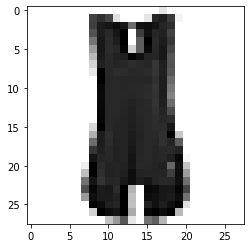

In [6]:
i=4
print(y_train_set[i])
plt.imshow(x_train_set[i],cmap='binary')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_set, y_train_set, random_state=1)

In [8]:
tf.random.set_seed(1)
np.random.seed(1)

In [16]:
gaus_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.GaussianNoise(stddev=0.2),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(30, activation='selu')
])
gaus_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu',input_shape=[30]),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])
gaus_ae = keras.models.Sequential([gaus_encoder, gaus_decoder])

In [17]:
gaus_encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise_1 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 30)                3030      
                                                                 
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


In [18]:
gaus_decoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3100      
                                                                 
 dense_7 (Dense)             (None, 784)               79184     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 82,284
Trainable params: 82,284
Non-trainable params: 0
_________________________________________________________________


In [19]:
gaus_ae.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 30)                81530     
                                                                 
 sequential_4 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [20]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true),tf.round(y_pred))

In [21]:
gaus_ae.compile(loss='binary_crossentropy',
      optimizer=keras.optimizers.SGD(learning_rate=1.0),
      metrics=[rounded_accuracy])

In [22]:
train = gaus_ae.fit(x_train,x_train,epochs=10,
          validation_data=(x_valid,x_valid))

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 0.3542 - rounded_accuracy: 0.8738 - val_loss: 0.3192 - val_rounded_accuracy: 0.9040
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3152 - rounded_accuracy: 0.9075 - val_loss: 0.3113 - val_rounded_accuracy: 0.9133
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3079 - rounded_accuracy: 0.9135 - val_loss: 0.3028 - val_rounded_accuracy: 0.9160
Epoch 4/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3042 - rounded_accuracy: 0.9167 - val_loss: 0.3027 - val_rounded_accuracy: 0.9199
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3014 - rounded_accuracy: 0.9192 - val_loss: 0.2967 - val_rounded_accuracy: 0.9224
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2989 - rounded_accuracy: 0.9212 - val_loss: 0.2961 - val_rounded_accuracy: 0.9242
Epoch 7/10
1407/1407 [============

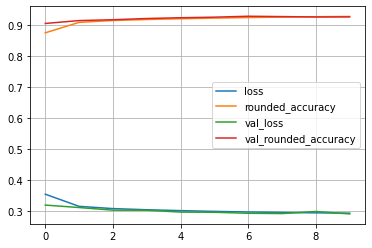

In [23]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [24]:
tf.random.set_seed(1)
np.random.seed(1)

noise =keras.layers.GaussianNoise(0.2)
x_test_noise = noise(x_test,training=True)

In [25]:
gaus_ae.evaluate(x_test_noise, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2968 - rounded_accuracy: 0.9202


[0.29678836464881897, 0.920190691947937]

In [26]:
x_test_decoded = gaus_ae.predict(x_test_noise)

313/313 [==============================] - 1s 3ms/step


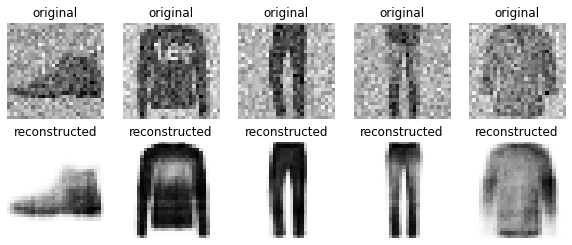

In [27]:
plt.figure(figsize=(10,4))
for i in range(5):
  plt.subplot(2,5,1+i)
  plt.imshow(x_test_noise[i], cmap='binary')
  plt.title('original')
  plt.axis('off')

  plt.subplot(2,5,1+5+i)
  plt.imshow(x_test_decoded[i], cmap='binary')
  plt.title('reconstructed')
  plt.axis('off')
plt.show()

Stacked denoising Autoencoder(Dropout)

In [28]:
tf.random.set_seed(1)
np.random.seed(1)

In [29]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(30, activation='selu')
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu',input_shape=[30]),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])

In [30]:
dropout_encoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 30)                3030      
                                                                 
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


In [31]:
dropout_decoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               3100      
                                                                 
 dense_11 (Dense)            (None, 784)               79184     
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 82,284
Trainable params: 82,284
Non-trainable params: 0
_________________________________________________________________


In [32]:
dropout_ae.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 30)                81530     
                                                                 
 sequential_7 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [33]:
dropout_ae.compile(loss='binary_crossentropy',
      optimizer=keras.optimizers.SGD(learning_rate=1.0),
      metrics=[rounded_accuracy])

In [34]:
train = dropout_ae.fit(x_train, x_train, epochs=10,
            validation_data=(x_valid, x_valid))

Epoch 1/10
1407/1407 [==============================] - 11s 7ms/step - loss: 0.3604 - rounded_accuracy: 0.8683 - val_loss: 0.3224 - val_rounded_accuracy: 0.9019
Epoch 2/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3216 - rounded_accuracy: 0.9003 - val_loss: 0.3127 - val_rounded_accuracy: 0.9069
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3149 - rounded_accuracy: 0.9057 - val_loss: 0.3068 - val_rounded_accuracy: 0.9131
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3105 - rounded_accuracy: 0.9094 - val_loss: 0.3049 - val_rounded_accuracy: 0.9131
Epoch 5/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3077 - rounded_accuracy: 0.9119 - val_loss: 0.3055 - val_rounded_accuracy: 0.9090
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3057 - rounded_accuracy: 0.9135 - val_loss: 0.2999 - val_rounded_accuracy: 0.9166
Epoch 7/10
1407/1407 [=============

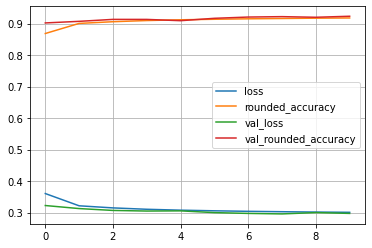

In [35]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [39]:
tf.random.set_seed(1)
np.random.seed(1)

dropout = keras.layers.Dropout(0.5)
x_test_dropout = dropout(x_test, training=True)

In [40]:
dropout_ae.evaluate(x_test_dropout,x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3056 - rounded_accuracy: 0.9166


[0.30561181902885437, 0.9165603518486023]

In [41]:
x_test_decoded = dropout_ae.predict(x_test_dropout)

313/313 [==============================] - 1s 4ms/step


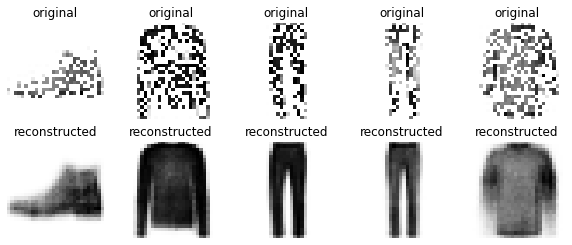

In [42]:
plt.figure(figsize=(10,4))
for i in range(5):
  plt.subplot(2,5,1+i)
  plt.imshow(x_test_dropout[i], cmap='binary')
  plt.title('original')
  plt.axis('off')

  plt.subplot(2,5,1+5+i)
  plt.imshow(x_test_decoded[i], cmap='binary')
  plt.title('reconstructed')
  plt.axis('off')
plt.show()